<a href="https://colab.research.google.com/github/irenewuuuu/customer-churn/blob/main/ML_project_customer_churn_7_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Churn - machine learning project
* Data: bank churn from Kaggle
* Goal: discover the top factors that influence user rentation
* package: numpy, pandas, sklearn
* models: Logistic Regression, Random Forests, K-nearest neigbhours
* regularization
* model evaluation: confusion metrix, accuracy rate, precision rate, recall rate, ROC curve, AUC

# to do list
* data standardize vs. normalize
* **estimated salary**: how to further clear the data to reflects the same type of salary (hourly or annual)
* encoding types for categorical variable


# if i have more time, what can i do to refine the analysis
* increase data size
* increase feature size to include more features, e.g.
* try more advanced model, e.g.

# load data

## load data from google drive
pending: what's the difference as upload data to colab directly and then open with pd.read_csv?

In [ ]:
# load data from google drive, install pydrive to load data, below coding blocks are provided by google

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# save bank data in google drive, update the accessibility to anyone and then get the link, ID is included in the link
# https://drive.google.com/file/d/1aUHWMy3gxH2KylBgxVHRnTPqhV9fWW42/view?usp=sharing
id = "1aUHWMy3gxH2KylBgxVHRnTPqhV9fWW42"
file = drive.CreateFile({'id':id})
file.GetContentFile('bank_churn.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('bank_churn.csv')


In [ ]:
# on the left, connect to google drive file, then right click the file and copy path, open as below
df_test = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

# data exploration

In [ ]:
!pip install ydata_profiling
import ydata_profiling
ydata_profiling.ProfileReport(df)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=7266c012da28b3f814b214412d77eaf8e53bd24e4f9fe1e176e8265b0288183b
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.info() # get info about columns, columns data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

from above summary and some statistic numbers for each column, we can get below:
* different columns have different orders of magnitude, we need **standardize or normalize** the data
* we can notice some pertential **outliers**, some columns, e.g. estimated data, with huge difference of min and max, the min is so low and we have reason to believe that it is hourly rate, while other people reports annual salary. for this column, we need to ***further clear the data ***to make sure every number reports the same type of salary
* the maximum tenure with the bank is ten, does this mean this bank is a very young bank? what can we do to limit this top line


In [ ]:
df.isnull().sum() # check missing value

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

from the above we have below insights:
* some features has nothing to do with our analysis, can be dropped: row number, customerId, surname
* categorical feature: geography, gender, need encoding
* has credit card, is active member, should be categorical in nature, but represented by intger, okay to proceed with no furgher processing
* credit score, age, tenure, balance, number of products has different order of magnitude, we can do standardization or normalization to convert them to similar range

In [ ]:
# check number of nunique values for each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## get target variable 'Exited'

In [ ]:
y = df['Exited']
type(y)

pandas.core.series.Series

## check feature distribution using plots

* Matplotlib is the most popular data visualization library of Python and is a 2D plotting library. It is the most widely-used library for plotting in the Python community and is more than a decade old. Matplotlib can plot anything but complex plots might take much more codes than other libraries
* The Python data visualization library of Seaborn is a **library based on Matplotlib**. It provides a much more terse API for creating KDE-based visualizations. Seaborn is a higher-level version of Matplotlib. Even though it does not have a wide collection as Matplotlib, seaborn makes popular plots such as bar plot, box plot, heatmap, etc look pretty in less code.
* Ggplot is a Python implementation of the Grammar of Graphics of R programming language. It is a system for declaratively creating graphics, based on the Grammar of Graphics and is tightly integrated with Pandas.
* Plotly is great to create interactive and publication-quality graphs with few lines of code.
* Altair is ideal for sophisticated charts to show statistics. Altair cannot handle data above 5000 samples and some simple charts do not look as styled compared to Plotly or Seaborn.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

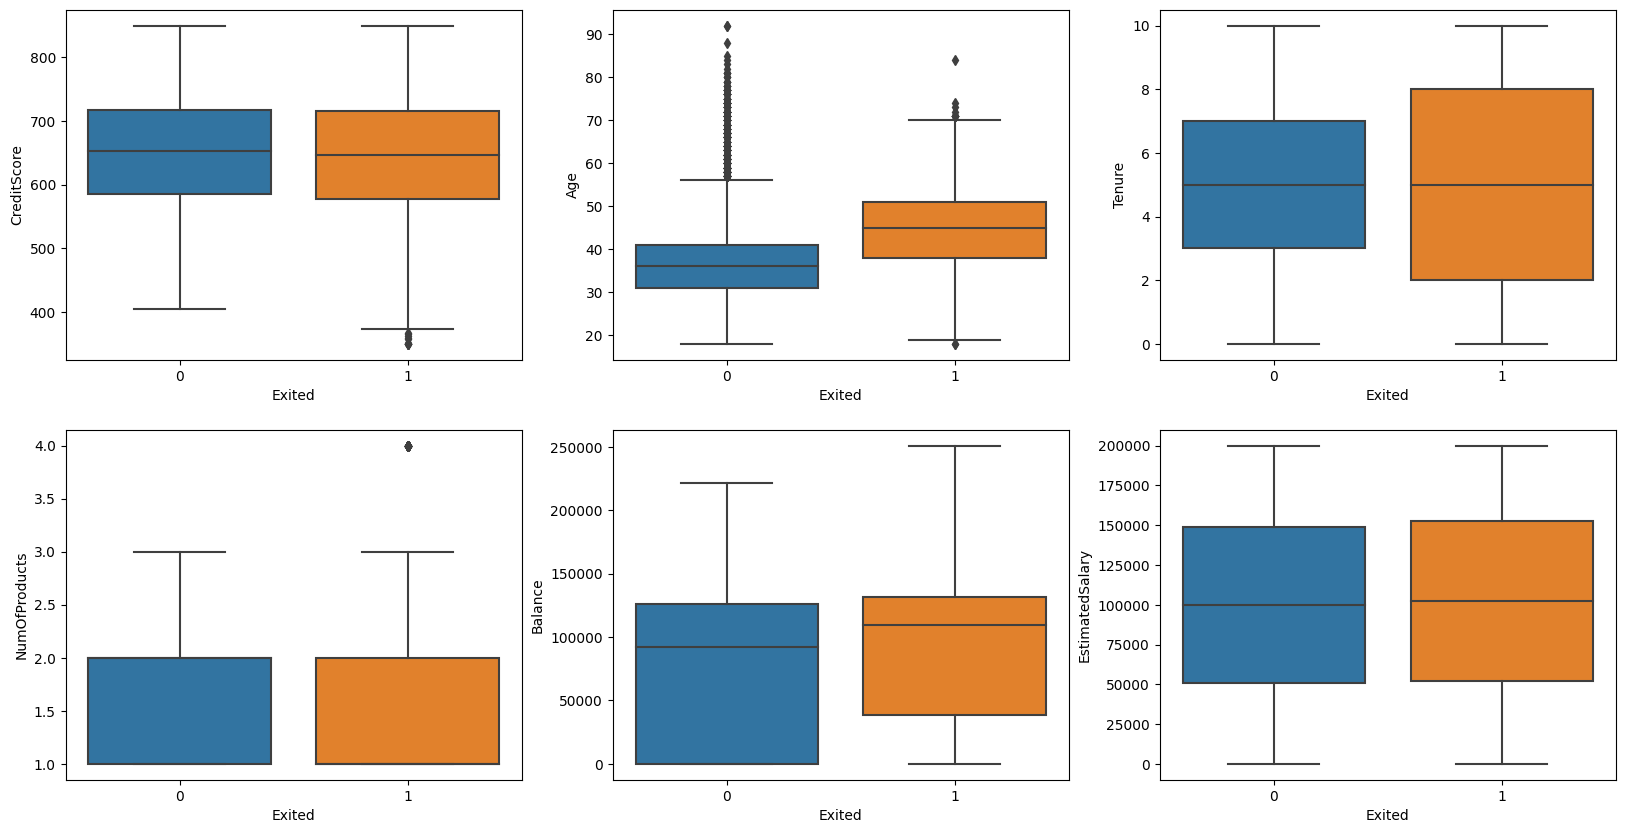

In [ ]:
# boxplot for numerical features
_,axss = plt.subplots(2,3,figsize = [20,10])
sns.boxplot(x = 'Exited', y = 'CreditScore', data = df, ax=axss[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = df, ax=axss[0][1])
sns.boxplot(x = 'Exited', y = 'Tenure', data = df, ax=axss[0][2])
sns.boxplot(x = 'Exited', y = 'NumOfProducts', data = df, ax=axss[1][0])
sns.boxplot(x = 'Exited', y = 'Balance', data = df, ax=axss[1][1])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df, ax=axss[1][2])


based on above boxplots, looks like credit score, estimated salary, number of products do not have an obvious impact on customer retention, while age might be an important reason for customer retention, which shows that those customers that leave the bank are overall older than those stayed. Also, per pearson correlation, age and exited have the highest correlation, higher than 0.5, among all features.
We'll see if this is the same story that the models tell.

<Axes: xlabel='Exited', ylabel='count'>

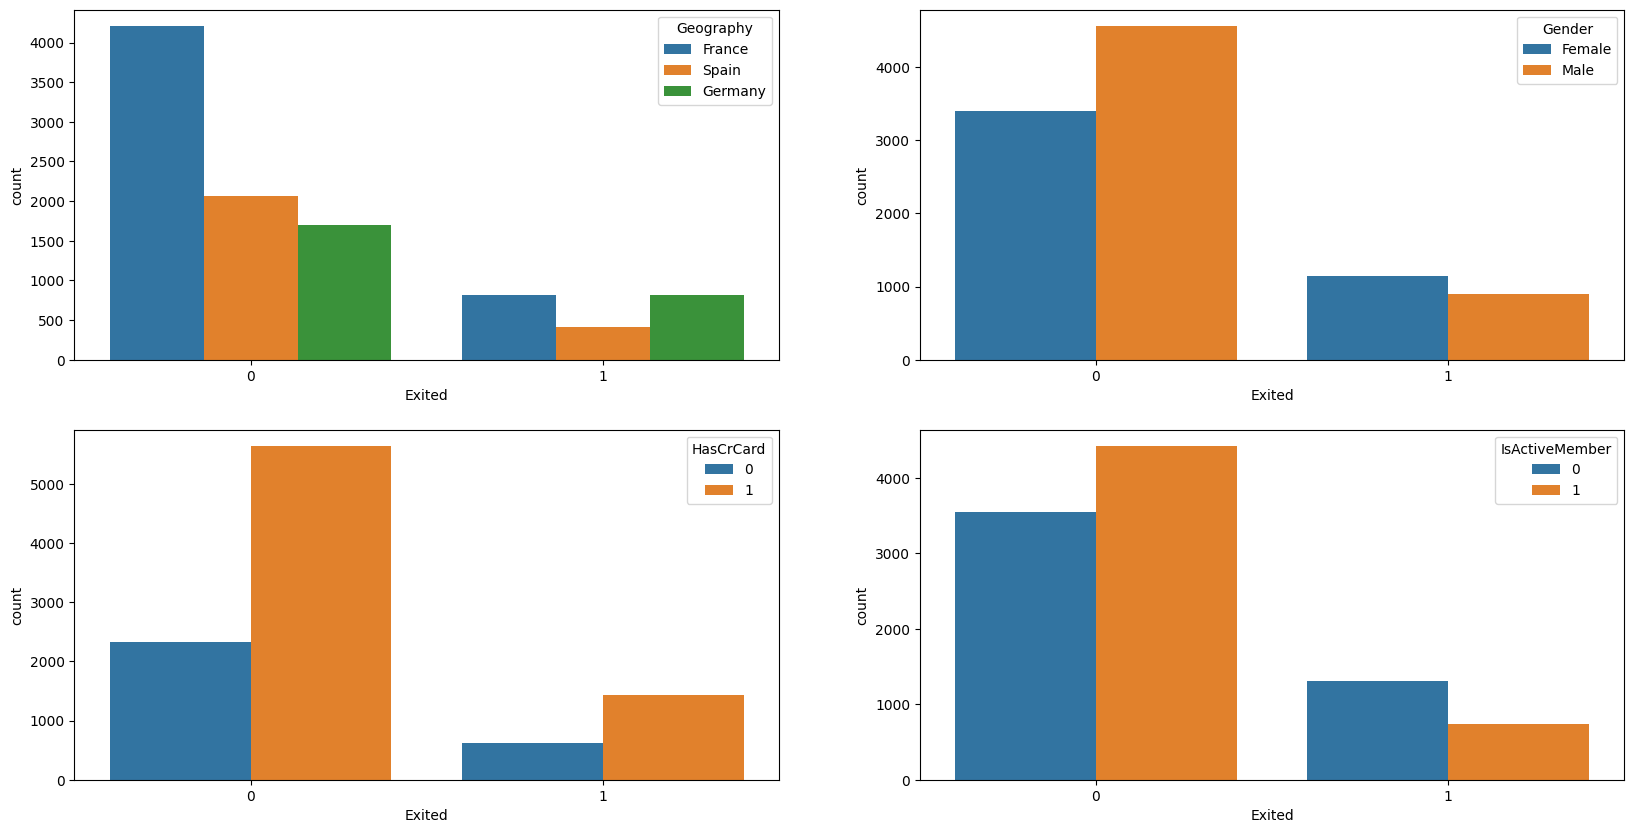

In [ ]:
# understand categorical features, geography, gender, hasCrCards, isActiveMember

_,axss = plt.subplots(2,2, figsize = [20,10])
sns.countplot(x='Exited', hue='Geography', data = df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data = df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data = df,  ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data = df, ax=axss[1][1])

based on plots above, looks like, female is more likely to leave, those who are no longer active are more likely to leave. it would be better that we can use stacked plot, which shows the percentage each components for both exited or not. then it would be easier to see the change of percentage

# feature preprocessing/feature engineering
why feature preprocessing: garbage in garbage out, so before modeling, drop useless features

In [ ]:
# get feature space by dropping useless features
to_drop = ['RowNumber', 'CustomerId','Surname','Exited']
X = df.drop(to_drop, axis = 1)

In [ ]:
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [ ]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [ ]:
# get categorical features and numerical features
cat_cols = X.columns[X.dtypes == 'object']
num_cols = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]

there are other simpler method to find out categorical feature and numerical feature, ***search online***

In [ ]:
cat_cols

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
num_cols

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

## data split
split data into training data and testing data. there might be validation set as well, but most of the time, when data is not large enough, just split as trainning and testing set,
* 80:20
* 75:25

data split and feature processing, which comes first:
data split first. because testing set should be foreign to the model, so we cannot do the processing altogether

In [ ]:
# stratified sampling
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size =0.25, stratify = y, random_state=1)


In [ ]:
print('training data has '+ str(X_train.shape[0]) + ' observations with ' + str(X_train.shape[1]) + ' features')
print('testing data has ' + str(X_test.shape[0]) + ' observations with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observations with 10 features
testing data has 2500 observations with 10 features


In [ ]:
X_train.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
7971          633     Spain    Male   42      10      0.00              1   
9152          708   Germany  Female   23       4  71433.08              1   
6732          548    France  Female   37       9      0.00              2   
902           645    France  Female   48       7  90612.34              1   
2996          729     Spain  Female   45       7  91091.06              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
7971          0               1         79408.17  
9152          1               0        103697.57  
6732          0               0         98029.58  
902           1               1        149139.13  
2996          1               0         71133.12

## categorical variable encoding
* one hot encoding
* ordinal encoding
https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/

### one hot encoding
with OneHotEncoder from sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# oneHotEncoder() practice
enc_ohe = OneHotEncoder()
a = enc_ohe.fit_transform(X_train[['Geography']]) # pass one column of a dataframe, cannot only pass an array, so double []
a1 = a.toarray()
print(type(a))

print(type(a1))
print(a1)



<class 'scipy.sparse._csr.csr_matrix'>
<class 'numpy.ndarray'>
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
'''
define a function for one-hot encoding, which will return the updated dataframe by dropping
the original catergorical column and then concatenate the remaining dataframe with newly generated
columns for one hot encoding. the process also includes, encode the categorical column, get the column name
'''
def OneHotEncoding(df, enc, categories):
  transformed = pd.DataFrame(enc.fit_transform(df[categories]).toarray(), columns= enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis = 1).drop(categories, axis =1)



In [ ]:
categories = ['Geography']
enc_ohe = OneHotEncoder()
X_train_1 = OneHotEncoding(X_train, enc_ohe, categories)
X_test_1 = OneHotEncoding(X_test, enc_ohe, categories)

In [ ]:
X_train_1.head()

CreditScore  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          633    Male   42      10      0.00              1          0   
1          708  Female   23       4  71433.08              1          1   
2          548  Female   37       9      0.00              2          0   
3          645  Female   48       7  90612.34              1          1   
4          729  Female   45       7  91091.06              2          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1         79408.17               0.0                0.0   
1               0        103697.57               0.0                1.0   
2               0         98029.58               1.0                0.0   
3               1        149139.13               1.0                0.0   
4               0         71133.12               0.0                0.0   

   Geography_Spain  
0              1.0  
1              0.0  
2              0.0  
3              0.0  
4              1.0

In [ ]:
X_test_1.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          767  Female   44       2  152509.25              1          1   
1          662    Male   37       5   94901.09              1          1   
2          710    Male   37       6  135795.63              1          0   
3          621    Male   50       3  163085.79              1          0   
4          515    Male   45       7  120961.50              3          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1        136915.15               1.0                0.0   
1               1         48233.75               0.0                0.0   
2               1         46523.60               0.0                1.0   
3               1        131048.36               0.0                0.0   
4               1         39288.11               0.0                1.0   

   Geography_Spain  
0              0.0  
1              1.0  
2              0.0  
3              1.0  
4              0.0

### ordinal encoding
with OridnalEncoder from sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc_oe = OrdinalEncoder()
categories = ['Gender']

X_train_1[categories] = enc_oe.fit_transform(X_train_1[categories]) # update the data frame direclty
X_test_1[categories] = enc_oe.fit_transform(X_test_1[categories])


In [ ]:
print(type(X_train_1))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train_1.head()

CreditScore  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          633     1.0   42      10      0.00              1          0   
1          708     0.0   23       4  71433.08              1          1   
2          548     0.0   37       9      0.00              2          0   
3          645     0.0   48       7  90612.34              1          1   
4          729     0.0   45       7  91091.06              2          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1         79408.17               0.0                0.0   
1               0        103697.57               0.0                1.0   
2               0         98029.58               1.0                0.0   
3               1        149139.13               1.0                0.0   
4               0         71133.12               0.0                0.0   

   Geography_Spain  
0              1.0  
1              0.0  
2              0.0  
3              0.0  
4              1.0

In [ ]:
X_train.head()

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
7971          633     Spain    Male   42      10      0.00              1   
9152          708   Germany  Female   23       4  71433.08              1   
6732          548    France  Female   37       9      0.00              2   
902           645    France  Female   48       7  90612.34              1   
2996          729     Spain  Female   45       7  91091.06              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
7971          0               1         79408.17  
9152          1               0        103697.57  
6732          0               0         98029.58  
902           1               1        149139.13  
2996          1               0         71133.12

In [ ]:
X_test_1.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          767     0.0   44       2  152509.25              1          1   
1          662     1.0   37       5   94901.09              1          1   
2          710     1.0   37       6  135795.63              1          0   
3          621     1.0   50       3  163085.79              1          0   
4          515     1.0   45       7  120961.50              3          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1        136915.15               1.0                0.0   
1               1         48233.75               0.0                0.0   
2               1         46523.60               0.0                1.0   
3               1        131048.36               0.0                0.0   
4               1         39288.11               0.0                1.0   

   Geography_Spain  
0              0.0  
1              1.0  
2              0.0  
3              1.0  
4              0.0

In [ ]:
X_test.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2660          767    France  Female   44       2  152509.25              1   
3535          662     Spain    Male   37       5   94901.09              1   
9695          710   Germany    Male   37       6  135795.63              1   
6686          621     Spain    Male   50       3  163085.79              1   
7155          515   Germany    Male   45       7  120961.50              3   

      HasCrCard  IsActiveMember  EstimatedSalary  
2660          1               1        136915.15  
3535          1               1         48233.75  
9695          0               1         46523.60  
6686          0               1        131048.36  
7155          1               1         39288.11

### standardize/normalize the numerical data
* Scale the data, using standardization
standardization (x-mean)/std
normalization (x-x_min)/(x_max-x_min) ->[0,1]
* why do this?
1. speed up gradient descent
2. same scale
3. algorithm requirments

* for example, use training data to train the standardscaler to get mean and std
apply mean and std to both training and testing data.
fit_transform does the training and applying, transform only does applying.


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.htmlsphx-glr-auto-examples-preprocessing-plot-all-scaling-py

https://scikit-learn.org/stable/modules/preprocessing.html



https://www.statology.org/standardization-vs-normalization/

* A normalized dataset will always have values that range between 0 and 1. **xnew = (xi – xmin) / (xmax – xmin)**

Typically we normalize data when performing some type of analysis in which we have multiple variables that are measured on different scales and **we want each of the variables to have the same range**.
This prevents one variable from being overly influential, especially if it’s measured in different units (i.e. if one variable is measured in inches and another is measured in yards).
* A standardized dataset will have a mean of 0 and standard deviation of 1, but there is no specific upper or lower bound for the maximum and minimum values. **xnew = (xi – x) / s**

we typically standardize data when **we’d like to know how many standard deviations each value in a dataset lies from the mean**.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_1[num_cols] = scaler.fit_transform(X_train_1[num_cols])
X_test_1[num_cols] = scaler.fit_transform(X_test_1[num_cols])


In [ ]:
X_train_1.head()

CreditScore  Gender       Age    Tenure   Balance  NumOfProducts  \
0    -0.172985     1.0  0.289202  1.731199 -1.218916      -0.912769   
1     0.602407     0.0 -1.509319 -0.341156 -0.076977      -0.912769   
2    -1.051762     0.0 -0.184093  1.385806 -1.218916       0.796109   
3    -0.048922     0.0  0.857156  0.695022  0.229625      -0.912769   
4     0.819517     0.0  0.573179  0.695022  0.237278       0.796109   

   HasCrCard  IsActiveMember  EstimatedSalary  Geography_France  \
0  -1.542199        0.968496        -0.352044               0.0   
1   0.648425       -1.032529         0.072315               0.0   
2  -1.542199       -1.032529        -0.026711               1.0   
3   0.648425        0.968496         0.866221               1.0   
4   0.648425       -1.032529        -0.496617               0.0   

   Geography_Germany  Geography_Spain  
0                0.0              1.0  
1                1.0              0.0  
2                0.0              0.0  
3                0.0              0.0  
4                0.0              1.0

# model training and evaluation
the default score function is mean accuracy

## model training

In [ ]:
# import model packages from sklearn and build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

classifier_logistic = LogisticRegression()
classifier_KNN = KNeighborsClassifier()
classifier_RF = RandomForestClassifier()

### logistric regression

In [ ]:
# train the model
classifier_logistic.fit(X_train_1, y_train)

LogisticRegression()

In [ ]:
# predict the test data

classifier_logistic.predict(X_test_1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# accuracy of the test data. the default score function is mean accuracy
classifier_logistic.score(X_test_1, y_test)

0.8076

### random forest

In [ ]:
classifier_RF.fit(X_train_1, y_train)

RandomForestClassifier()

In [ ]:
classifier_RF.predict(X_test_1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
classifier_RF.score(X_test_1, y_test)

0.8596

### K nearest neigbhours

In [ ]:
classifier_KNN.fit(X_train_1, y_train)

KNeighborsClassifier()

In [ ]:
classifier_KNN.predict(X_test_1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
classifier_KNN.score(X_test_1, y_test)

0.836

### use grid search to find optimal hyperparameters


In [ ]:
# define a function to print out the best parameters and hyperparameters

def print_grid_search_metrics(gs):
  print('Best score: ' + str(gs.best_score_))
  print('Best parameter set:')
  best_parameters = gs.best_params_
  for parameter_name in sorted(best_parameters.keys()):
    print(parameter_name + ':' + str(best_parameters[parameter_name]))

find optimal hyperparameters for logistic regression
* loss function, L1 or L2(ridgeregression)
* L1 is very unstable, but can be used for feature selection. if there are two features that are strongly correlated, one of the feature's parameter will be very small, can be treated as zero, in this way, the model kind of get rid of that feature.
*

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {
    'penalty':('l1','l2'),
    'C':(0.01, 0.05, 0.1, 0.2, 1, 2) # C = 1/lambda
}

grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv = 5)

'''
solver: an algorithm to find the weights that minimize the cost/loss funtion.
liblinear help to decide which regularization to use, l1 or l2
cv = 5: k-fold cross validation k=5
'''
grid_LR.fit(X_train_1, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (0.01, 0.05, 0.1, 0.2, 1, 2),
                         'penalty': ('l1', 'l2')})

In [ ]:
print_grid_search_metrics(grid_LR)

Best score: 0.8125333333333333
Best parameter set:
C:0.2
penalty:l1


In [ ]:
best_LR_model = grid_LR.best_estimator_
best_LR_model.predict(X_test_1)
best_LR_model.score(X_test_1, y_test)

0.8112

In [ ]:
LR_models = pd.DataFrame(grid_LR.cv_results_)

In [ ]:
LR_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      12 non-null     float64
 1   std_fit_time       12 non-null     float64
 2   mean_score_time    12 non-null     float64
 3   std_score_time     12 non-null     float64
 4   param_C            12 non-null     object 
 5   param_penalty      12 non-null     object 
 6   params             12 non-null     object 
 7   split0_test_score  12 non-null     float64
 8   split1_test_score  12 non-null     float64
 9   split2_test_score  12 non-null     float64
 10  split3_test_score  12 non-null     float64
 11  split4_test_score  12 non-null     float64
 12  mean_test_score    12 non-null     float64
 13  std_test_score     12 non-null     float64
 14  rank_test_score    12 non-null     int32  
dtypes: float64(11), int32(1), object(3)
memory usage: 1.5+ KB


In [ ]:
LR_models.describe()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
count      12.000000     12.000000        12.000000       12.000000   
mean        0.033495      0.013094         0.004697        0.001632   
std         0.030992      0.026156         0.001647        0.001124   
min         0.016008      0.000438         0.003356        0.000073   
25%         0.017013      0.001545         0.003619        0.000501   
50%         0.022192      0.002695         0.004326        0.001820   
75%         0.037443      0.010509         0.004879        0.002532   
max         0.126625      0.092838         0.009379        0.003133   

       split0_test_score  split1_test_score  split2_test_score  \
count          12.000000          12.000000          12.000000   
mean            0.818611           0.805389           0.805333   
std             0.004435           0.004055           0.003663   
min             0.804667           0.792667           0.794000   
25%             0.819333           0.806000           0.806000   
50%             0.820000           0.806667           0.806667   
75%             0.820167           0.806667           0.806667   
max             0.820667           0.808000           0.807333   

       split3_test_score  split4_test_score  mean_test_score  std_test_score  \
count          12.000000          12.000000        12.000000       12.000000   
mean            0.808222           0.817722         0.811056        0.005969   
std             0.002500           0.003954         0.003657        0.000314   
min             0.800667           0.806000         0.799600        0.005426   
25%             0.808000           0.817667         0.811733        0.005810   
50%             0.809333           0.819000         0.812333        0.006016   
75%             0.809333           0.820000         0.812433        0.006180   
max             0.810000           0.820667         0.812533        0.006414   

       rank_test_score  
count        12.000000  
mean          6.000000  
std           4.022663  
min           1.000000  
25%           3.250000  
50%           5.500000  
75%           9.250000  
max          12.000000

In [ ]:
# use a heatmap to visualize the c hyperparameter, penalty type and corresponding score

results = (LR_models.pivot(index = 'param_penalty', columns = 'param_C', values = 'mean_test_score'))
# extract three columns
results

<ipython-input-61-c294f8e66e90>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results = (LR_models.pivot(index = 'param_penalty', columns = 'param_C', values = 'mean_test_score'))


param_C          0.01      0.05      0.10      0.20      1.00      2.00
param_penalty                                                          
l1             0.7996  0.810933  0.812400  0.812533  0.812533  0.812533
l2             0.8108  0.812267  0.812267  0.812000  0.812400  0.812400

<Axes: xlabel='param_C', ylabel='param_penalty'>

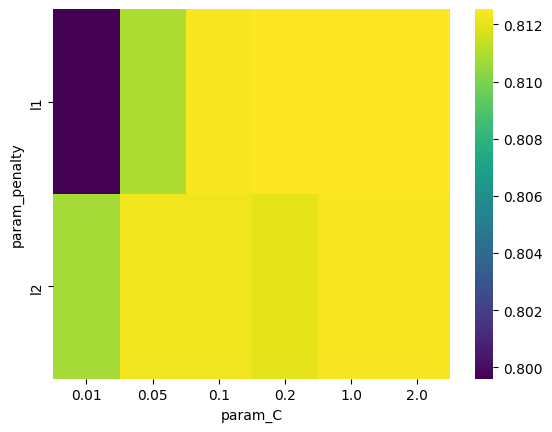

In [ ]:
sns.heatmap(results, cmap = 'viridis')

find optimal Hyperparameters: KNN

K
* when I first pass parameters [1,3,5,7,9], 9 is the best parameter, hence I went on increase the parameter to 13, 13 is the best parameter, kept increase to 19, 13 is the best parameter. Hence, I am confident to say that 13 is the best parameter. Theoretically, if I keep increase parameters, the accuracy rate might increase, but is not cost effective.
* note, use odd number for KNN

In [ ]:
parameters = {
    'n_neighbors':[10,12,13,14,16]
}

grid_KNN = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
grid_KNN.fit(X_train_1, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10, 12, 13, 14, 16]})

In [ ]:
# note, parameter names/keys are pre-defined, see below
grid_KNN.estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [ ]:
print_grid_search_metrics(grid_KNN)


Best score: 0.8453333333333333
Best parameter set:
n_neighbors:13


find optimal Hyperparameter for Rrandom Forest
* n number of trees
* depth of each tree
* subset of features for each tree

In [ ]:
parameters = {
    'n_estimators': [100,120,140],
    'max_depth':[10,15]
}

grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)
grid_RF.fit(X_train_1, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15],
                         'n_estimators': [100, 120, 140]})

In [ ]:
print_grid_search_metrics(grid_RF)

Best score: 0.8674666666666667
Best parameter set:
max_depth:10
n_estimators:140


In [ ]:
best_RF_model = grid_RF.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=10, n_estimators=140)

In [ ]:
best_RF_model.predict(X_test_1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
best_RF_model.score(X_test_1, y_test)

0.8616

# model evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
  tn = cm[0][0]
  fp = cm[0][1]
  fn = cm[1][0]
  tp = cm[1][1]
  accuracy = (tn + tp)/(tn+tp+fn+fp+0.0) # why plus 0.0 at the end? avoid being 0?
  precision = tp/(tp+fp+0.0)
  recall = tp/(tp+fn+0.0)
  print(classifier)
  print('Accuracy is: '+ str(accuracy))
  print('Precision is: '+ str(precision))
  print('Recall is: ' + str(recall))



In [ ]:
# print out confusion matrix

def draw_confusion_matricies(confusion_matricies):
  class_name = ['Not','Churn']
  for cm in confusion_matricies:
    classifier, cm = cm[0],cm[1]
    cal_evaluation(classifier, cm)

In [ ]:
# confusion matrix, accuracy, precision and recall for random forest and logistic regression

confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test_1))),
    ("Logistic Regression", confusion_matrix(y_test, best_LR_model.predict(X_test_1)))
    # ("K Nearest Neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test_1)))

]

draw_confusion_matricies(confusion_matrices)

Random Forest
Accuracy is: 0.8616
Precision is: 0.8122605363984674
Recall is: 0.4165029469548134
Logistic Regression
Accuracy is: 0.8112
Precision is: 0.6081871345029239
Recall is: 0.2043222003929273
